In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print('Shape of train dataset : {}\n'.format(df_train.shape))
print('Shape of test dataset  : {}\n'.format(df_test.shape))
print('Columns in dataset     : {}'.format(df_train.columns))

Shape of train dataset : (36992, 25)

Shape of test dataset  : (19919, 24)

Columns in dataset     : Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')


In [4]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', df_train.shape[1])

In [5]:
df_train.head(5)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [6]:
df_train.drop(['customer_id', 'Name','security_no', 'referral_id', 'last_visit_time'], axis=1, inplace = True)
df_test.drop([ 'Name', 'security_no', 'referral_id', 'last_visit_time'], axis=1, inplace = True)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def missing_plot(df):
    fig, ax = plt.subplots(figsize=(15,7))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

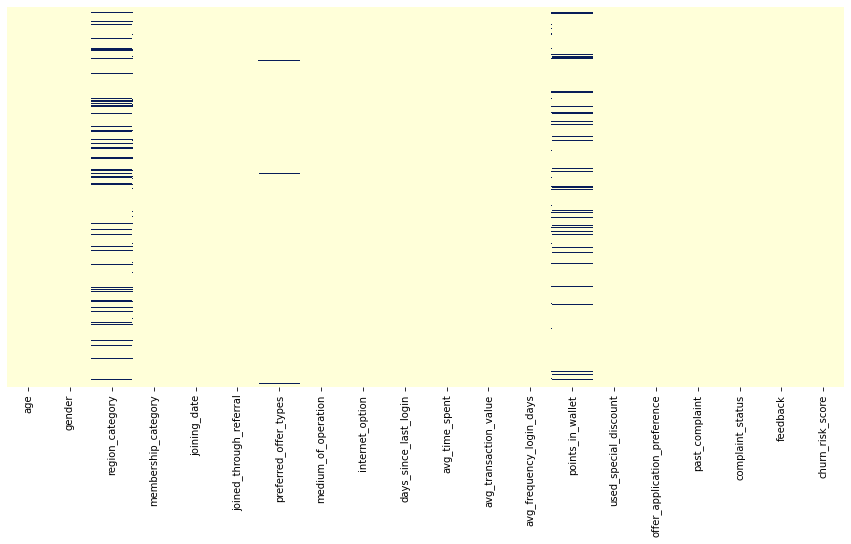

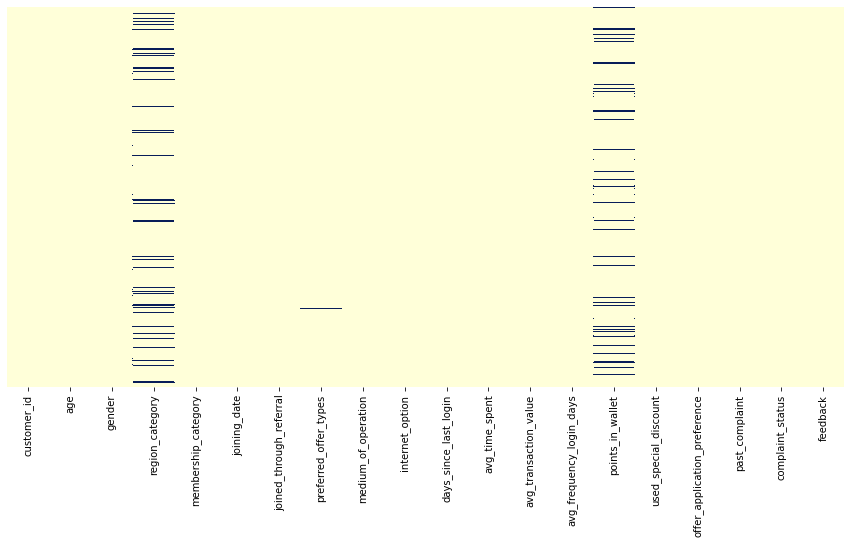

In [8]:
missing_plot(df_train)
missing_plot(df_test)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       36992 non-null  object 
 6   preferred_offer_types         36704 non-null  object 
 7   medium_of_operation           36992 non-null  object 
 8   internet_option               36992 non-null  object 
 9   days_since_last_login         36992 non-null  int64  
 10  avg_time_spent                36992 non-null  float64
 11  avg_transaction_value         36992 non-null  float64
 12  avg_frequency_login_days      36992 non-null  object 
 13  p

In [10]:
df_train.isna().sum()/df_train.shape[0]*100

age                              0.000000
gender                           0.000000
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral          0.000000
preferred_offer_types            0.778547
medium_of_operation              0.000000
internet_option                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64

In [11]:
def fillna(dataframe, column, valueToReplaceWith):
    dataframe[column].fillna(valueToReplaceWith,inplace = True)

In [12]:
df_train['region_category'].fillna(df_train.region_category.value_counts().idxmax(),inplace=True)
df_test['region_category'].fillna(df_test.region_category.value_counts().idxmax(),inplace=True)

In [13]:
# df_train['points_in_wallet'].mode()

In [14]:
df_train['points_in_wallet'].fillna(df_train['points_in_wallet'].mean(),inplace=True)
df_test['points_in_wallet'].fillna(df_train['points_in_wallet'].mean(),inplace=True)

In [15]:
print('Unique value in columns points_in_wallet in train dataset : \n\n{}\n'.format(df_train.preferred_offer_types.value_counts()))
print('Unique value in columns points_in_wallet in test dataset : \n\n{}'.format(df_test.preferred_offer_types.value_counts()))

Unique value in columns points_in_wallet in train dataset : 

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

Unique value in columns points_in_wallet in test dataset : 

Without Offers              6663
Credit/Debit Card Offers    6602
Gift Vouchers/Coupons       6495
Name: preferred_offer_types, dtype: int64


In [16]:
df_train['preferred_offer_types'].value_counts().idxmax()

'Gift Vouchers/Coupons'

In [17]:
df_train['preferred_offer_types'].fillna(df_train['preferred_offer_types'].value_counts().idxmax(),inplace=True)
df_test['preferred_offer_types'].fillna(df_train['preferred_offer_types'].value_counts().idxmax(),inplace=True)

In [18]:
df_train[['region_category', 'preferred_offer_types', 'points_in_wallet']].isna().any()

region_category          False
preferred_offer_types    False
points_in_wallet         False
dtype: bool

In [19]:
# label encoding on categorical features
def mapFeature(data, column, data_test=None):
    uni = data[column].unique()
    uni_lable = [x for x in range(len(uni))]

    data[column].replace(uni, uni_lable, inplace=True)
    if data_test is not None:
        data_test[column].replace(uni, uni_lable, inplace=True)

In [20]:
import numpy as np

def divideFeatures(data):
    numerical_features = data.select_dtypes(include=[np.number])
    categorical_features = data.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [21]:
numerical_features, categorical_features = divideFeatures(df_train)

In [22]:
for i in categorical_features.columns:
    print('*'*80)
    print('Columns name : {}'.format(i))
    print('value count for train dataset : \n\n{}'.format(df_train[i].value_counts()))
    print('value count for test dataset : \n\n{}'.format(df_test[i].value_counts()))
    

********************************************************************************
Columns name : gender
value count for train dataset : 

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64
value count for test dataset : 

F          9972
M          9911
Unknown      36
Name: gender, dtype: int64
********************************************************************************
Columns name : region_category
value count for train dataset : 

Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64
value count for test dataset : 

Town       10583
City        6792
Village     2544
Name: region_category, dtype: int64
********************************************************************************
Columns name : membership_category
value count for train dataset : 

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: 

In [23]:
df_train['joining_date'] = pd.to_datetime(df_train['joining_date'])
df_test['joining_date'] = pd.to_datetime(df_test['joining_date'])

In [24]:
df_train['days_since_joined'] = df_train['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)
df_test['days_since_joined'] = df_test['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)

In [25]:
df_train.drop('joining_date',axis=1,inplace=True)
df_test.drop('joining_date',axis=1,inplace=True)

In [26]:
df_train['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [27]:
df_train['joined_through_referral'].replace('?','No',inplace=True)
df_test['joined_through_referral'].replace('?','No',inplace=True)

In [28]:
df_train['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [29]:
df_train['medium_of_operation'].replace('?','Desktop',inplace=True)
df_test['medium_of_operation'].replace('?','Desktop',inplace=True)

In [30]:
df_train['avg_frequency_login_days'].value_counts()

Error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
0.25763032669551933       1
47.74895185875996         1
53.26179301964002         1
0.00920810011942308       1
-10.881573561845777       1
Name: avg_frequency_login_days, Length: 1654, dtype: int64

In [31]:
df_train['avg_frequency_login_days'] = df_train['avg_frequency_login_days'].apply(lambda x : 0 if x == 'Error' else x)
df_test['avg_frequency_login_days'] = df_test['avg_frequency_login_days'].apply(lambda x : 0 if x == 'Error' else x)

In [32]:
df_train['avg_frequency_login_days'] = pd.to_numeric(df_train['avg_frequency_login_days'])
df_test['avg_frequency_login_days'] = pd.to_numeric(df_test['avg_frequency_login_days'])

In [33]:
df_train['avg_frequency_login_days'][df_train['avg_frequency_login_days']<0]

157     -12.714311
165      -1.590067
181     -13.646850
309      -5.339639
606     -15.725901
           ...    
36775   -15.241874
36847    -3.530457
36879   -12.756645
36920    -9.325511
36936    -8.759330
Name: avg_frequency_login_days, Length: 683, dtype: float64

In [34]:
df_train['days_since_last_login'].replace(-999,df_train['days_since_last_login'].value_counts().idxmax(),inplace=True)
df_test['days_since_last_login'].replace(-999,df_train['days_since_last_login'].value_counts().idxmax(),inplace=True)

In [35]:
df_train.loc[df_train.points_in_wallet<0]

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,days_since_joined
67,28,M,Village,Basic Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,4,457.33,20883.28,14.0,-549.357498,No,Yes,No,Not Applicable,Too many ads,5,1264
70,59,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,12,207.52,12556.28,10.0,-44.597633,No,Yes,No,Not Applicable,No reason specified,4,1407
213,42,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,8,179.84,39667.91,10.0,-38.084314,No,Yes,No,Not Applicable,Poor Product Quality,3,1844
340,38,F,Town,Basic Membership,No,Without Offers,Desktop,Fiber_Optic,6,176.66,29048.04,21.0,-288.247333,Yes,No,Yes,No Information Available,Poor Product Quality,5,2022
625,40,F,City,Premium Membership,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,12,104.47,87823.92,16.0,-301.998780,Yes,No,No,Not Applicable,Reasonable Price,1,1679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35411,13,M,City,Silver Membership,No,Without Offers,Desktop,Wi-Fi,21,32.85,30273.31,7.0,-108.057352,No,Yes,Yes,Solved in Follow-up,Too many ads,3,1367
35883,63,M,Town,Basic Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,12,158.85,46377.80,25.0,-99.476870,Yes,No,Yes,No Information Available,Too many ads,5,1774
35943,27,F,Town,Platinum Membership,No,Without Offers,Desktop,Wi-Fi,16,169.58,28162.81,12.0,-43.109270,Yes,No,No,Not Applicable,No reason specified,3,1663
36414,43,M,Town,Platinum Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,5,40.54,868.01,0.0,-170.497210,Yes,No,No,Not Applicable,No reason specified,3,1563


In [36]:
df_train['points_in_wallet'] = df_train['points_in_wallet'].apply(lambda x : x*-1 if x<0 else x)
df_test['points_in_wallet'] = df_test['points_in_wallet'].apply(lambda x : x*-1 if x<0 else x)

In [37]:
df_train['avg_time_spent'] = df_train['avg_time_spent'].apply(lambda x : x*-1 if x<0 else x)
df_test['avg_time_spent'] = df_test['avg_time_spent'].apply(lambda x : x*-1 if x<0 else x)

In [38]:
df_train['avg_frequency_login_days'] = df_train['avg_frequency_login_days'].apply(lambda x : x*-1 if x<0 else x)
df_test['avg_frequency_login_days'] = df_test['avg_frequency_login_days'].apply(lambda x : x*-1 if x<0 else x)

In [39]:
numerical_features, categorical_features = divideFeatures(df_train)

In [40]:
categorical_features.columns

Index(['gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In [41]:
numerical_features.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'churn_risk_score', 'days_since_joined'],
      dtype='object')

In [42]:
df_train['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [43]:
df_train['churn_risk_score'] = df_train['churn_risk_score'].apply(lambda x : 1 if x==-1 else 0 if x==5 else x)

In [44]:
df_train['churn_risk_score'].value_counts()

3    10424
4    10185
0     9827
1     3815
2     2741
Name: churn_risk_score, dtype: int64

In [45]:
for column in categorical_features.columns:
    mapFeature(df_train, column, df_test)

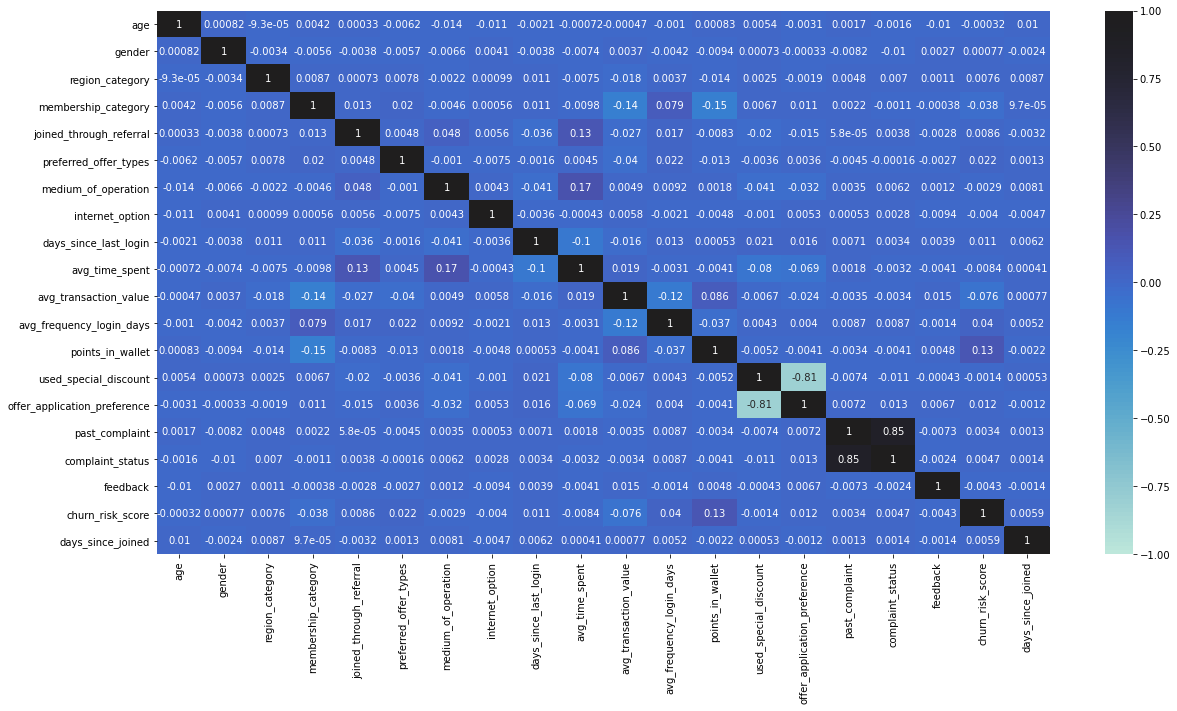

In [46]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax= 1, center= True)
plt.show()

In [47]:
df_train.corr()['churn_risk_score']

age                            -0.000320
gender                          0.000767
region_category                 0.007647
membership_category            -0.037924
joined_through_referral         0.008637
preferred_offer_types           0.021591
medium_of_operation            -0.002941
internet_option                -0.004013
days_since_last_login           0.011291
avg_time_spent                 -0.008382
avg_transaction_value          -0.076065
avg_frequency_login_days        0.039588
points_in_wallet                0.128494
used_special_discount          -0.001371
offer_application_preference    0.012130
past_complaint                  0.003430
complaint_status                0.004684
feedback                       -0.004311
churn_risk_score                1.000000
days_since_joined               0.005851
Name: churn_risk_score, dtype: float64

In [48]:
numerical_features.drop('churn_risk_score',axis=1,inplace=True)

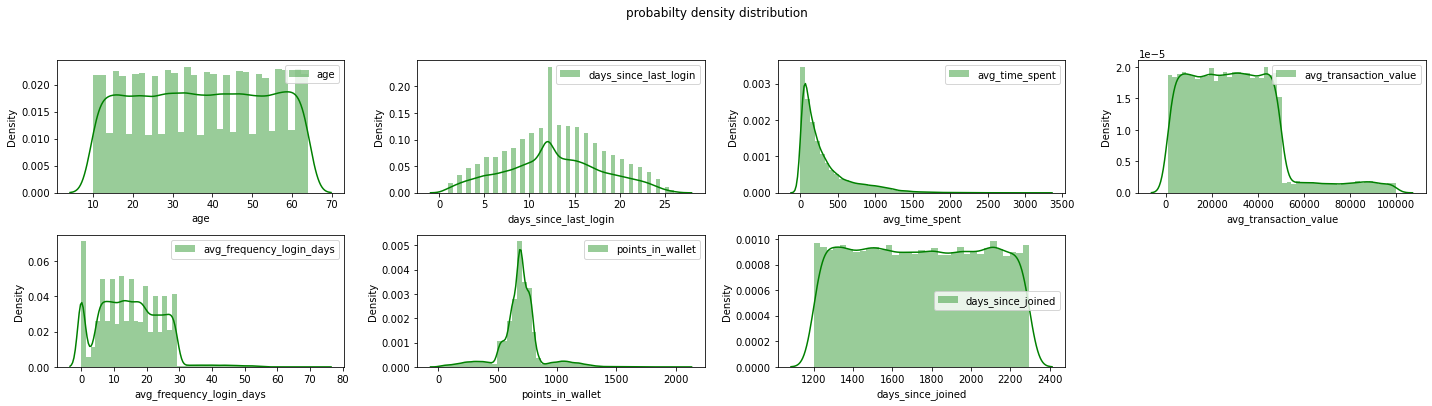

In [49]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in numerical_features.columns:
    plt.subplot(df_train.shape[1]//2, 4, j+1)
    j += 1
    sns.distplot(df_train[i], color='g', label = i)
    plt.legend(loc='best')
    
fig.suptitle('probabilty density distribution')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [50]:
# fig = plt.figure(figsize = (20, 25))
# j = 0
# for i in df_train.columns:
#     plt.subplot(df_train.shape[1]//4+1, 4, j+1)
#     j += 1
#     sns.boxplot(x =df_train[i],color='r')
# #     plt.legend(loc='best')
    
# fig.suptitle('Box plot')
# fig.tight_layout()
# fig.subplots_adjust(top=0.95)
# plt.show()

In [51]:
# @ Data are Fairly symmetric :
def skewness(data):
    print('*'*50)
    print('Symmetric Data or Approx Normal Distribution :')
    print(data.skew()[(data.skew()>= -0.5) & (data.skew()<=0.5)])

    print('*'*50)
    print('Moderate  skewed Data Distribution :')
    print(data.skew()[((data.skew()<= -0.5) & (data.skew()>=-1)) | ((data.skew()>= 0.5) & (data.skew()<=1))])

    print('*'*50)
    print('Highly Skewed Data  Distribution :')
    print(data.skew()[(data.skew() <= -1) | (data.skew() >= 1)])
    
    
skewness(df_train[numerical_features.columns])
print('\n########################################################\n')
skewness(df_test[numerical_features.columns])

**************************************************
Symmetric Data or Approx Normal Distribution :
age                        -0.007319
days_since_last_login       0.051809
avg_frequency_login_days    0.408566
points_in_wallet            0.207331
days_since_joined           0.009656
dtype: float64
**************************************************
Moderate  skewed Data Distribution :
Series([], dtype: float64)
**************************************************
Highly Skewed Data  Distribution :
avg_time_spent           1.992459
avg_transaction_value    1.011027
dtype: float64

########################################################

**************************************************
Symmetric Data or Approx Normal Distribution :
age                      0.008715
days_since_last_login    0.078680
points_in_wallet         0.099277
days_since_joined        0.008879
dtype: float64
**************************************************
Moderate  skewed Data Distribution :
avg_frequency_login_da

In [52]:
df_train.describe()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,days_since_joined
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,0.501757,1.401627,2.778871,0.424822,0.984970,0.581099,0.995215,12.717561,314.822566,29271.194003,14.861658,688.104635,0.450097,0.447448,0.497135,1.240944,4.005704,2.198016,1745.793063
std,15.867412,0.503184,0.703130,1.641138,0.494323,0.817307,0.670392,0.816289,5.422649,344.671872,19444.806226,9.323597,180.206764,0.497510,0.497237,0.499999,1.475723,1.891060,1.584205,317.860926
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.837399,800.460000,0.000000,0.788907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1201.000000
25%,23.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,75.427500,14177.540000,8.000000,624.365000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1470.000000
50%,37.000000,1.000000,2.000000,3.000000,0.000000,1.000000,0.000000,1.000000,12.000000,186.175000,27554.485000,15.000000,686.882199,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,1745.000000
75%,51.000000,1.000000,2.000000,4.000000,1.000000,2.000000,1.000000,2.000000,16.000000,416.155000,40855.110000,22.000000,757.010000,1.000000,1.000000,1.000000,2.000000,5.000000,4.000000,2023.000000
max,64.000000,2.000000,2.000000,5.000000,1.000000,2.000000,2.000000,2.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000,1.000000,1.000000,4.000000,8.000000,4.000000,2296.000000


In [53]:
# import numpy as np

# def log_(da,col):
#     return (round((da[col]-da[col].min()+1) .transform(np.log),2))


# for col in ['days_since_last_login','avg_transaction_value']:
#     df_train[col+'_log'] = log_(df_train,col)
#     df_test[col+'_log'] = log_(df_test,col)
    
    
# df_train.drop('')

In [54]:
def minmax(data):
    from sklearn.preprocessing import MinMaxScaler
    
    names = data.columns
    scaler = MinMaxScaler(feature_range=(0,1))
    data_ = scaler.fit_transform(data)
    return pd.DataFrame(data_, columns=names)



def Standardization(data):
    
    from sklearn.preprocessing import StandardScaler
    
    names = data.columns
    scaler = StandardScaler()
    data_ = scaler.fit_transform(data)
    return pd.DataFrame(data_, columns=names)

In [55]:
# df_train[numerical_features.columns] = Standardization(df_train[numerical_features.columns])
# df_test[numerical_features.columns] = Standardization(df_train[numerical_features.columns])

In [56]:
df_train[numerical_features.columns]

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,days_since_joined
0,18,17,300.630000,53005.25,17.0,781.750000,1337
1,32,16,306.340000,12838.38,10.0,686.882199,1326
2,44,14,516.160000,21027.00,22.0,500.690000,1616
3,37,11,53.270000,25239.56,6.0,567.660000,1629
4,31,20,113.130000,24483.66,16.0,663.060000,1311
...,...,...,...,...,...,...,...
36987,46,2,650.682759,27277.68,6.0,639.510000,1302
36988,29,13,638.123421,11069.71,28.0,527.990000,1753
36989,23,12,154.940000,38127.56,0.0,680.470000,1677
36990,53,15,482.610000,2378.86,20.0,197.264414,1400


In [57]:
def confusion_mat(model,y_test, ypred):
    
    conf_mat = confusion_matrix(y_test, ypred)
    
    label = [i for i in range(len(y_test.unique()))]
    fig, ax = plt.subplots(figsize=(7,7))
    sns.heatmap(
        conf_mat, annot=True, fmt='d', xticklabels=label,
        yticklabels=label,cmap="YlGnBu",linewidths=.5
    )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print('\033[1m')
    print('='*80)


In [58]:
def RandomSearchCV(est ,X, Y, random_grid):
    from sklearn.model_selection import RandomizedSearchCV
#   from sklearn.ensemble import RandomForestRegressor
    rf_random = RandomizedSearchCV(estimator = est, param_distributions = random_grid, n_iter = 1000, cv = 10, verbose=1, random_state=42, n_jobs = -1)
    rf_random.fit(X, Y)
    return rf_random

In [59]:
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix ,accuracy_score,f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.utils import class_weight

In [60]:
def printScore(y_train, y_train_pred):
    print(f1_score(y_train, y_train_pred, average="macro"))

In [61]:
df_train.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'days_since_joined'],
      dtype='object')

In [62]:
df_train.churn_risk_score.value_counts()

3    10424
4    10185
0     9827
1     3815
2     2741
Name: churn_risk_score, dtype: int64

In [63]:
# df_train.drop(['used_special_discount', 'past_complaint'],axis=1,inplace=True)
# df_test.drop(['used_special_discount', 'past_complaint'],axis=1,inplace=True)

In [64]:
# df0 = df_train[df_train.churn_risk_score==0].sample(2741)
# df1 = df_train[df_train.churn_risk_score==1].sample(2741)
# df2 = df_train[df_train.churn_risk_score==2].sample(2741)
# df3 = df_train[df_train.churn_risk_score==3].sample(2741)
# df4 = df_train[df_train.churn_risk_score==4].sample(2741)

# df = pd.concat([df0,df1,df2,df3,df4],axis=0)

# df.reset_index(drop=True,inplace=True)

In [65]:
from sklearn.model_selection import train_test_split

df_shuffle = df_train.sample(frac=1).reset_index(drop=True)

Y = df_shuffle.pop('churn_risk_score')
X = df_shuffle

# split into train dev and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)
print(f"Train set has {x_train.shape[0]} records out of {len(df_shuffle)} which is {round(x_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {x_test.shape[0]} records out of {len(df_shuffle)} which is {round(x_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 33292 records out of 36992 which is 90%
Test set has 3700 records out of 36992 which is 10%


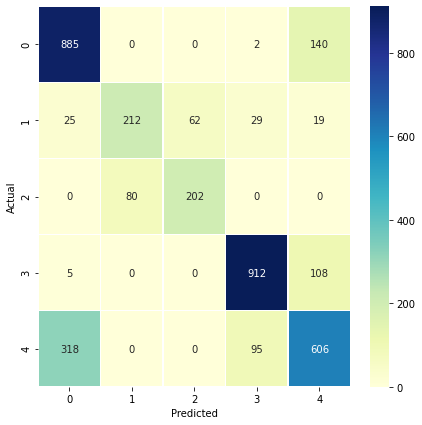


classification report 
               precision    recall  f1-score   support

           0       0.72      0.86      0.78      1027
           1       0.73      0.61      0.66       347
           2       0.77      0.72      0.74       282
           3       0.88      0.89      0.88      1025
           4       0.69      0.59      0.64      1019

    accuracy                           0.76      3700
   macro avg       0.76      0.73      0.74      3700
weighted avg       0.76      0.76      0.76      3700

0.9239757299050823
0.7613513513513513
0.9262310369142845
0.7422781240321973


In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(verbose=0, random_state=1, n_jobs=-1, class_weight='balanced_subsample',
                                 n_estimators=100,max_depth=15, 
                                 min_samples_split = 5, min_samples_leaf = 1
                                )
rf_model.fit(x_train, y_train)

# predict
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

confusion_mat('Random Forest',y_test, y_test_pred)
print("classification report \n",classification_report(y_test, y_test_pred))

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

In [67]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = dict(enumerate(class_weights))

In [68]:
# !pip install catboost

{'learn': {'MultiClass': 0.47695758717608505}, 'validation': {'MultiClass': 0.5083114580867694}}


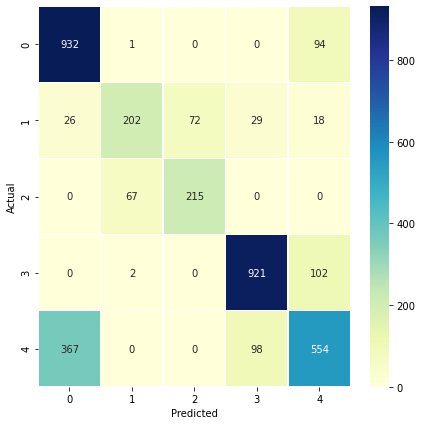


classification report 
               precision    recall  f1-score   support

           0       0.70      0.91      0.79      1027
           1       0.74      0.58      0.65       347
           2       0.75      0.76      0.76       282
           3       0.88      0.90      0.89      1025
           4       0.72      0.54      0.62      1019

    accuracy                           0.76      3700
   macro avg       0.76      0.74      0.74      3700
weighted avg       0.76      0.76      0.76      3700

0.8086026673074612
0.7632432432432432
0.8096210400860093
0.7418990482219884


In [69]:
import catboost as cb

cat_model = cb.CatBoostClassifier(verbose=0, iterations=100,   class_weights=class_weights)

cat_model.fit(x_train, y_train, eval_set=(x_test, y_test))
print(cat_model.best_score_)

y_train_pred = cat_model.predict(x_train)
y_test_pred = cat_model.predict(x_test)

confusion_mat('CatBoostClassifier',y_test,y_test_pred)
print("classification report \n",classification_report(y_test, y_test_pred))

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

In [70]:
# !pip install lightgbm

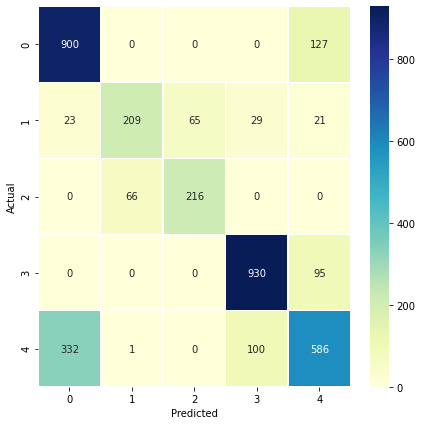


classification report 
               precision    recall  f1-score   support

           0       0.72      0.88      0.79      1027
           1       0.76      0.60      0.67       347
           2       0.77      0.77      0.77       282
           3       0.88      0.91      0.89      1025
           4       0.71      0.58      0.63      1019

    accuracy                           0.77      3700
   macro avg       0.77      0.75      0.75      3700
weighted avg       0.77      0.77      0.76      3700

0.9241259161360087
0.7678378378378379
0.9295085331194194
0.7507520540152598


In [71]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective='multi', class_weight=class_weights, random_state=1, n_jobs=-1, 
                               learning_rate=0.15, 
                               n_estimators=100)
lgb_model.fit(x_train, y_train)

# predict
y_train_pred = lgb_model.predict(x_train)
y_test_pred = lgb_model.predict(x_test)

confusion_mat('lightgbm',y_test,y_test_pred)
print("classification report \n",classification_report(y_test, y_test_pred))

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 9}
Best score is 0.6849676832134026


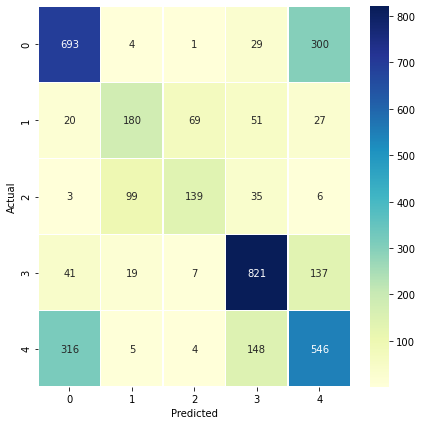


classification report 
               precision    recall  f1-score   support

           0       0.65      0.67      0.66      1027
           1       0.59      0.52      0.55       347
           2       0.63      0.49      0.55       282
           3       0.76      0.80      0.78      1025
           4       0.54      0.54      0.54      1019

    accuracy                           0.64      3700
   macro avg       0.63      0.60      0.62      3700
weighted avg       0.64      0.64      0.64      3700

0.7630962393367776
0.642972972972973
0.7383772986810555
0.6158841908978745


In [72]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV

classifier = DecisionTreeClassifier()
 
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 11 ),
              "min_samples_leaf": randint(1, 11),
              "criterion": ["gini", "entropy"]} 
decision_cv = RandomizedSearchCV(classifier, param_dist, cv = 10) 
decision_cv.fit(x_train, y_train)   
print("Tuned Decision Tree Parameters: {}".format(decision_cv.best_params_)) # Print the tuned parameters
print("Best score is {}".format(decision_cv.best_score_)) # Print score

# predict
y_train_pred = decision_cv.predict(x_train)
y_test_pred = decision_cv.predict(x_test)

confusion_mat('lightgbm',y_test,y_test_pred)
print("classification report \n",classification_report(y_test, y_test_pred))

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

In [73]:
# !pip install xgboost

[12:30:30] WARNING: ../src/learner.cc:573: 
Parameters: { "scoring", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:30:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


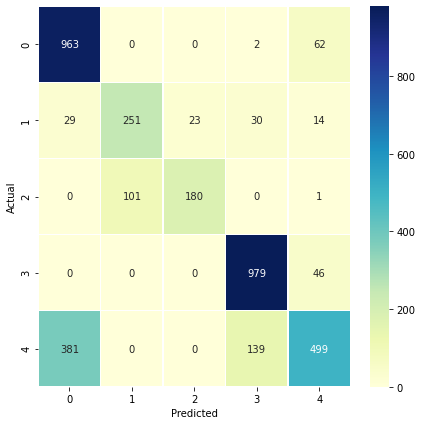


classification report 
               precision    recall  f1-score   support

           0       0.70      0.94      0.80      1027
           1       0.71      0.72      0.72       347
           2       0.89      0.64      0.74       282
           3       0.85      0.96      0.90      1025
           4       0.80      0.49      0.61      1019

    accuracy                           0.78      3700
   macro avg       0.79      0.75      0.75      3700
weighted avg       0.79      0.78      0.76      3700

0.8190856662261203
0.7762162162162162
0.81180163418999
0.7542664982947765


In [74]:
import xgboost as xg
seed = 19

xgb_model = xg.XGBClassifier(objective ='multi:softprob', random_state=seed, verbose=0, scoring='f1', 
                             learning_rate=0.001, subsample=0.5, n_jobs=-1, 
                             n_estimators=100, max_depth = 10)
xgb_model.fit(x_train, y_train)

# predict
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

confusion_mat('lightgbm',y_test,y_test_pred)
print("classification report \n",classification_report(y_test, y_test_pred))


print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

In [75]:
df_test.iloc[:,1:]

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,days_since_joined
0,50,0,0,1,0,2,1,0,12,386.26,40721.44,7.0,733.830000,0,1,0,0,4,1991
1,41,1,0,3,0,2,0,2,11,37.80,9644.40,9.0,726.000000,0,1,0,0,2,1871
2,31,0,2,4,0,0,2,1,18,215.36,3693.25,21.0,713.780000,0,1,1,2,3,1504
3,64,1,2,4,1,1,0,2,12,44.57,36809.56,11.0,744.970000,0,1,1,4,6,1336
4,16,0,2,2,1,2,1,1,6,349.88,40675.86,8.0,299.048351,1,0,1,2,2,2172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,12,1,2,3,0,2,0,2,16,103.57,46279.35,18.0,708.120000,1,0,0,0,4,2272
19915,40,0,0,2,1,2,0,2,21,63.19,23466.26,0.0,574.340000,1,0,0,0,3,1201
19916,55,1,2,2,0,1,0,1,18,68.72,17903.75,24.0,564.300000,1,0,1,3,3,2045
19917,17,0,1,4,1,1,1,2,3,119.54,14057.09,22.0,606.340000,1,0,0,0,2,1824


In [76]:
# decision_cv, rf_model,cat_model,lgb_model

In [81]:
k = cat_model.predict(df_test.iloc[:,1:])
# k = xgb_model.predict(df_test.iloc[:,1:])

df_final = df_test[['customer_id']]
df_final['churn_risk_score'] = k

df_final['churn_risk_score'] = df_final['churn_risk_score'].apply(lambda x : 5 if x==0 else x)
df_final.to_csv('validation.csv',index=False)

In [78]:
df_final.head()

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,3
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,5


In [79]:
from statistics import mode

pred1 = rf_model.predict(df_test.iloc[:,1:])
pred2 = cat_model.predict(df_test.iloc[:,1:])
pred3 = lgb_model.predict(df_test.iloc[:,1:])
pred4 = decision_cv.predict(df_test.iloc[:,1:])
pred5 = xgb_model.predict(df_test.iloc[:,1:])

final_pred = []
for i in range(0,df_test.shape[0]):
    final_pred.append(mode([pred1[i], int(pred2[i]), pred3[i], pred4[i], pred5[i]]))
    
    
df_final = df_test[['customer_id']]
df_final['churn_risk_score'] = final_pred

df_final['churn_risk_score'] = df_final['churn_risk_score'].apply(lambda x : 5 if x==0 else x)
df_final.to_csv('validation_v1.csv',index=False)

In [80]:
mode([pred1[i], int(pred2[i]), pred3[i], pred4[i], pred5[i]])

3